In [2]:
from pathlib import Path
import pandas as pd
import scanpy as sc

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

from filter_adata import adata_filtered, adata_hightumour, adata_peritumour

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_45548/905341600.py:44: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_filtered.obs["specific_cell_types"].replace(label_map)


<Figure size 1000x1000 with 0 Axes>

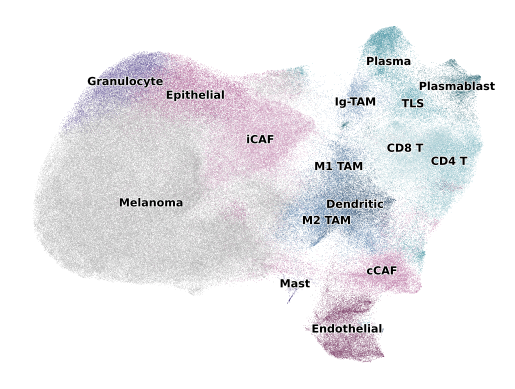

In [8]:
specific_colors = {
    "Melanoma": "#b0b0b0",
    "Endothelial": "#7C3C67",
    "Epithelial": "#AF5A93",
    "cCAF": "#BD75A5",
    "iCAF": "#CA91B7",
    "Mast": "#4B3D80",
    "Granulocyte": "#67589B",
    "Dendritic": "#264566",
    "M1 TAM": "#496F97",
    "M2 TAM": "#5B83AE",
    "Ig-TAM": "#7697BC",
    "Plasmablast": "#3E7682",
    "Plasma": "#4D99A8",
    "TLS": "#65AAB8",
    "CD4 T": "#81BAC5",
    "CD8 T": "#ABD1D8"
}
label_map = {
    "Proliferating Melanoma": "Melanoma",
    "Classical CAF": "cCAF",
    "Inflammatory CAF": "iCAF",
    "Ig-expressing TAM": "Ig-TAM",
    "Plasma B": "Plasma"
}
new_labels = [
    "Melanoma",
    "Endothelial",
    "Epithelial",
    "cCAF",
    "iCAF",
    "Granulocyte",
    "Dendritic",
    "M1 TAM",
    "M2 TAM",
    "Ig-TAM",
    "Plasmablast",
    "Plasma B",
    "TLS",
    "CD4 T",
    "CD8 T"
]
adata_filtered.obs["cell_type_label"] = (
    adata_filtered.obs["specific_cell_types"].replace(label_map)
)

adata_filtered.obs["cell_type_label"] = adata_filtered.obs["cell_type_label"].astype("category")

# Set colors in the same order as categories
categories = adata_filtered.obs["cell_type_label"].cat.categories
adata_filtered.uns["cell_type_label_colors"] = [specific_colors[c] for c in categories]

plt.figure(figsize=(10,10))
sc.pl.umap(
    adata_filtered,
    color="cell_type_label",
    legend_loc="on data",
    legend_fontsize=8,
    legend_fontoutline=1,
    frameon=False,
    show=False,
    title="",
)

# Build patches in desired order
handles = [
    mpatches.Patch(color=specific_colors[label], label=label)
    for label in new_labels if label in adata_filtered.obs["cell_type_label"].unique()
]

# Add side legend
#plt.legend(
    #handles=handles,
    #labels=new_labels,
    #bbox_to_anchor=(1.05, 1),   # push to the right
    #loc="upper left",
    #borderaxespad=0.,
    #fontsize=12,
    #frameon=False,
    #reverse=True
#)
plt.show()

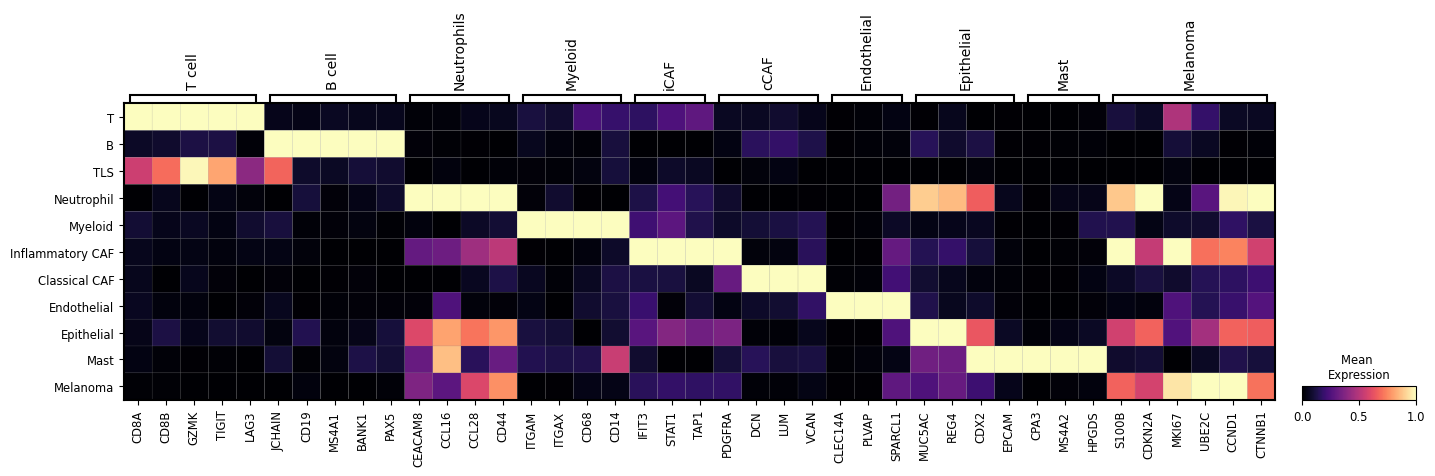

In [13]:
broad_markers = {
    'T cell': ['CD8A', 'CD8B', 'GZMK', 'TIGIT', 'LAG3'], # T cells (CD8)
    'B cell': ['JCHAIN', 'CD19', 'MS4A1', 'BANK1', 'PAX5'], # B cells
    # TLS markers should be a mix of above markers,
    'Neutrophils':['CEACAM8', 'CCL16', 'CCL28', 'CD44'], # neutrophils
    'Myeloid':['ITGAM', 'ITGAX', 'CD68', 'CD14'], # myeloid (mainly macro and monocytes)
    'iCAF':['IFIT3', 'STAT1', 'TAP1'], # inflammatory CAF
    'cCAF':['PDGFRA', 'DCN', 'LUM', 'VCAN'], # classical CAF
    'Endothelial':['CLEC14A', 'PLVAP', 'SPARCL1'], # endothelial
    'Epithelial':['MUC5AC', 'REG4', 'CDX2', 'EPCAM'], # epithelial
    'Mast':['CPA3', 'MS4A2', 'HPGDS'], # mast
    'Melanoma':['S100B', 'CDKN2A', 'MKI67', 'UBE2C', 'CCND1', 'CTNNB1'] # melanoma
}
broad_order = [
    'T',
    'B',
    'TLS',
    'Neutrophil',
    'Myeloid',
    'Inflammatory CAF',
    'Classical CAF',
    'Endothelial',
    'Epithelial',
    'Mast',
    'Melanoma'
]

mp = sc.pl.matrixplot(
    adata_filtered,
    broad_markers,
    'broad_cell_types',
    standard_scale='var',
    colorbar_title='Mean \nExpression',
    cmap='magma',
    return_fig=True,
    categories_order=broad_order
)

mp.show()